In [5]:
#import libraries
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import RANSACRegressor, LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [6]:
np.random.seed(1)

df2 = pd.read_csv("C:\ML1 CA\wall+following+robot+navigation+data\sensor_readings_2.data", header = None)
df4 = pd.read_csv("C:\ML1 CA\wall+following+robot+navigation+data\sensor_readings_4.data", header = None)
df24 = pd.read_csv("C:\ML1 CA\wall+following+robot+navigation+data\sensor_readings_24.data", header = None)


classes = ("Move-Forward", "Slight-Right-Turn", "Sharp-Right-Turn", "Slight-Left-Turn")
n_classes = len(classes)
#data preprocessing
for i, item in enumerate(classes):
    df2 = df2.replace(to_replace = item, value = i)
    df4 = df4.replace(to_replace = item, value = i)
    df24 = df24.replace(to_replace = item, value = i)

df = df24
from sklearn.model_selection import train_test_split
X = df.drop(24,axis=1).fillna(0) 
y = df[24]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
df_diff=X_train[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].diff(periods=1, axis=0)
df=pd.concat([X_train,df_diff],axis=1)
df.head()

C:\Users\vigne\AppData\Local\Temp\ipykernel_20936\3591477363.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace(to_replace = item, value = i)
C:\Users\vigne\AppData\Local\Temp\ipykernel_20936\3591477363.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4 = df4.replace(to_replace = item, value = i)
C:\Users\vigne\AppData\Local\Temp\ipykernel_20936\3591477363.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly c

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
5365,1.805,1.785,1.553,1.256,1.246,1.258,1.568,1.302,1.581,0.845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2584,1.707,2.669,2.648,1.925,1.913,1.955,5.000,1.950,2.306,2.012,...,0.000,-2.644,0.611,0.000,0.597,-3.039,-1.785,-0.893,-0.897,-0.904
2201,1.191,1.300,5.000,2.828,2.791,2.797,5.000,3.009,2.993,2.996,...,-1.439,3.389,-0.856,-4.379,-4.369,0.053,-0.272,-1.152,-0.592,-0.538
618,1.392,1.416,1.439,2.621,2.641,3.255,5.000,5.000,5.000,5.000,...,1.439,-4.429,-0.174,-0.174,-0.175,2.596,0.236,0.919,0.294,0.216
4680,0.822,0.848,1.442,1.451,1.473,5.000,5.000,4.107,5.000,5.000,...,-4.147,0.083,0.189,0.204,0.213,-2.384,0.035,-0.663,-0.599,-0.561


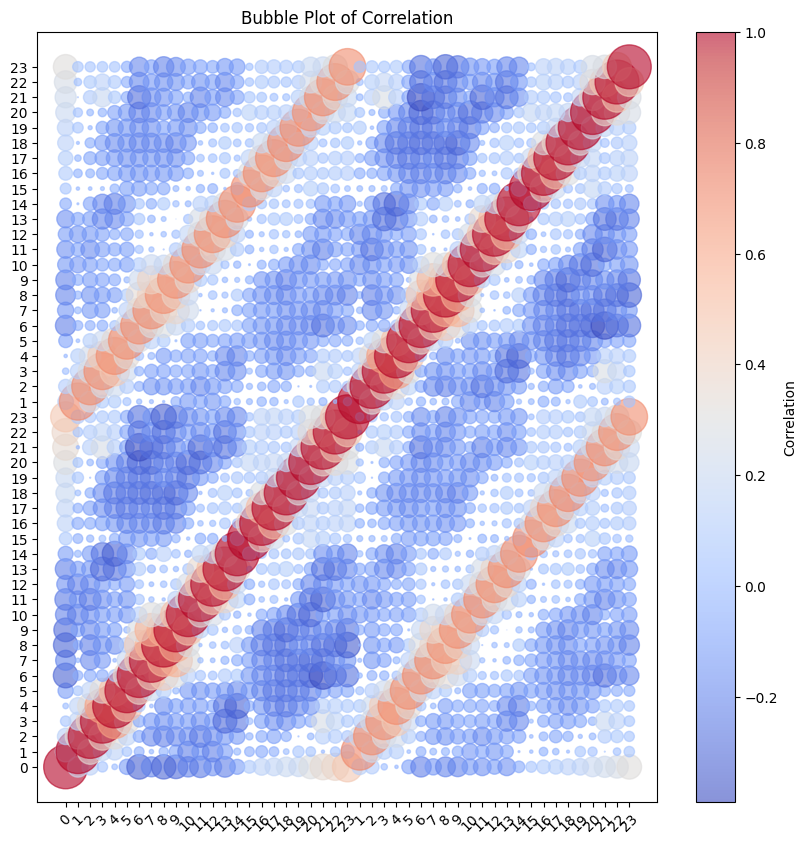

In [7]:
def plot_corr_bubble(df, size=10):        
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.set_title("Bubble Plot of Correlation")   
    column_names = corr.columns
    X, Y = np.meshgrid(np.arange(corr.shape[0]), np.arange(corr.shape[1]))
    bubble_size = np.abs(corr.values) * 1000  
    scatter = ax.scatter(X.flatten(), Y.flatten(), s=bubble_size.flatten(), cmap='coolwarm', c=corr.values.flatten(), alpha=0.6)
    ax.set_xticks(np.arange(len(column_names)))
    ax.set_yticks(np.arange(len(column_names)))
    ax.set_xticklabels(column_names, rotation=45)
    ax.set_yticklabels(column_names)
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Correlation')
    plt.show()
plot_corr_bubble(df)


LogisticRegression %error: 45.3 RMSLE: 0.49761858644816104
LogisticRegression Confusion Matrix


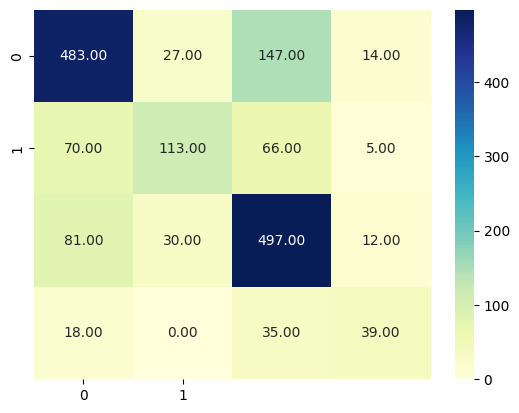

Accuracy 69.15 %
LogisticRegression Classification Report
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       671
           1       0.66      0.44      0.53       254
           2       0.67      0.80      0.73       620
           3       0.56      0.42      0.48        92

    accuracy                           0.69      1637
   macro avg       0.66      0.60      0.62      1637
weighted avg       0.69      0.69      0.68      1637

--------------------------------------------------------------------------------
DecisionTreeClassifier %error: 0.9 RMSLE: 0.07248706761217664
DecisionTreeClassifier Confusion Matrix


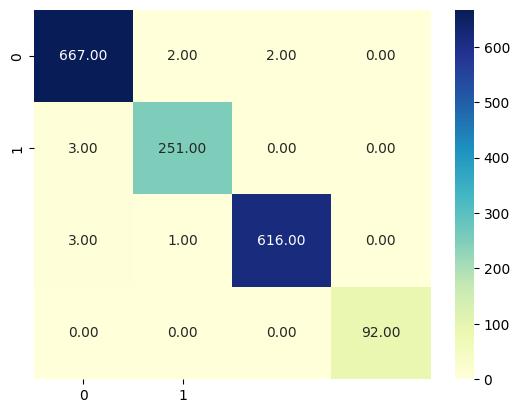

Accuracy 99.33 %
DecisionTreeClassifier Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       671
           1       0.99      0.99      0.99       254
           2       1.00      0.99      1.00       620
           3       1.00      1.00      1.00        92

    accuracy                           0.99      1637
   macro avg       0.99      0.99      0.99      1637
weighted avg       0.99      0.99      0.99      1637

--------------------------------------------------------------------------------
RANSACRegressor %error: 59.5 RMSLE: 0.4413350249743825
RANSACRegressor Confusion Matrix


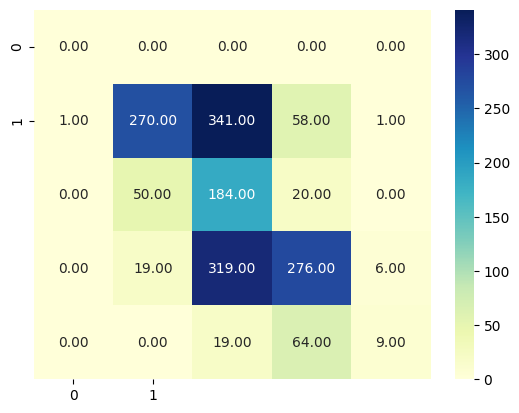

Accuracy 45.14 %
RANSACRegressor Classification Report
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.80      0.40      0.53       671
         1.0       0.21      0.72      0.33       254
         2.0       0.66      0.45      0.53       620
         3.0       0.56      0.10      0.17        92

    accuracy                           0.45      1637
   macro avg       0.45      0.33      0.31      1637
weighted avg       0.64      0.45      0.48      1637

--------------------------------------------------------------------------------


C:\Users\vigne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vigne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vigne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: Unde

In [8]:
def rmsle(y_predicted, y_real):
    return np.sqrt(np.mean(np.power(np.log1p(y_predicted) - np.log1p(y_real), 2)))

def procenterror(y_predicted, y_real):
    return np.round(np.mean(np.abs(y_predicted - y_real)) / np.mean(y_real) * 100, 1)

n_col = 22

names = ['LogisticRegression', 'DecisionTreeClassifier', 'RANSACRegressor']
classifiers = [LogisticRegression(), DecisionTreeClassifier(), RANSACRegressor()]

# Hyperparameter tuning
param_grids = [
    {'C': [0.1, 1, 10, 100, 1000], 'solver': ['liblinear'], 'penalty': ['l1', 'l2']},
    {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    {'min_samples': [1, 5, 10, 20], 'residual_threshold': [1, 2, 3]}
]

for name, clf, param_grid in zip(names, classifiers, param_grids):
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy' if name != 'RANSACRegressor' else 'neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    regr = best_estimator.fit(X_train, y_train)

    try:
        # Calculate metrics on the testing set
        y_pred = regr.predict(X_test)
        print(name, '%error:', procenterror(y_pred, y_test), 'RMSLE:', rmsle(y_pred, y_test))

        # Confusion Matrix
        print(name, 'Confusion Matrix')
        conf = confusion_matrix(y_test, np.round(y_pred))
        label = ["0", "1"]
        sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu",fmt=".2f")
        plt.show()
        # Accuracy
        accuracy = round(accuracy_score(y_test, np.round(y_pred)) * 100, 2)
        print('Accuracy', accuracy, '%')
        # Classification Report
        print(name, 'Classification Report')
        classif = classification_report(y_test, np.round(y_pred))
        print(classif)
        print('--' * 40)
    except ValueError as e:
        print(f"Error occurred for {name}: {e}")
